<img src="resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Day 1 Workshop 2, SWDB 2023 </h1> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
    In a regression problem, we are given pairs of data points $(\vec{x}_i, y_i)$ where $i \in [1,N]$.  We want to develop a function $f(\vec{x})$ such that $f(\vec{x}_i)\approx y_i$ for each pair of points in the data set.
    </p>
    <p>
    The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the analysis.  They are often called "features".  The coefficients $w_j$ are called "weights".

You may be familiar with a version of linear regression where the functions $\phi$ are chosen to be the identity and a constant.  When the input space is one dimensional this is:

$f(x) = w x + b$
</p>
<p>
    This problem is defined by an "error function", whose minimization tries to force the function $f$ to approximate the data points $y_i$ on the inputs $\vec{x}_i$.  This error function is

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $
</p>
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.
</p>

<p>
The `scikit-learn` website:  http://scikit-learn.org/stable/
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We're going to provide a simple example with fake data and then use the same model to fit data from the Brain Observatory.  The model we fit will be an $n$th order polynomial of a single variable:
</p>
<p>
$f_n(x) = \sum_{i=0}^n a_i x^i$
</p>
<p>
i.e.
</p>
<p>
$f_1(x) = a_0 + a_1 x$
</p>
<p>
$f_2(x) = a_0 + a_1 x + a_2x^2$
</p>
<p>
$\dots$
</p>
<p>
First we generate some example data.  This will be the true model of the data.  (In a real problem, we won't know this function; we're trying to fit it.)
</p>
<p>
$F(x) = \text{sin}(2\pi x)$
</p>
</div>

Text(0.5, 0, 'x')

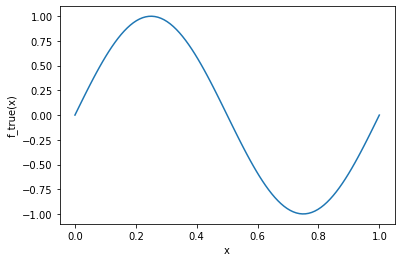

In [2]:
x0 = np.linspace(0,1.0, 100)

def f_true(xt): 
    return np.sin(2.0*np.pi*xt)

fig, ax = plt.subplots()
ax.plot(x0, f_true(x0))
ax.set_ylabel('f_true(x)')
ax.set_xlabel('x')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we generate some 'data' from this function.
    </p>
</div>

Text(0.5, 0, 'x')

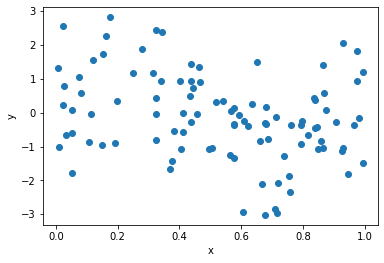

In [3]:
n = 100

x = np.sort(np.random.random(n))
y = f_true(x) + 1.0*np.random.normal(size=n)

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_ylabel('y')
ax.set_xlabel('x')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Fitting a first order polynomial.</h3>
</p>
<p>
Before we fit any models, we need to separate the data into train, validate, and test sets.  This is so that we can train the model (train), perform model comparison (validate), and test the performance of the model (test).
</p>
<p>
`scikit-learn` has a function we can use called `train_test_split`.  We use this function twice in order to generate a validation set.
</p>
</div>

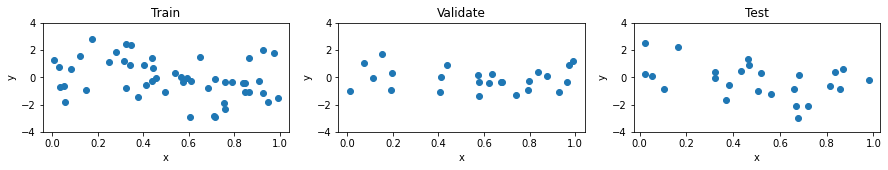

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(x, y, train_size=0.5)
x_validate, x_test, y_validate, y_test = train_test_split(x_validate, y_validate, test_size=0.5)

fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(x_train, y_train, 'o')
ax[1].plot(x_validate, y_validate, 'o')
ax[2].plot(x_test, y_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In ordert to fit the model, we need to create the object that will manage the fitting.  We are going to use the `LinearRegression` model from `sklearn.linear_model`.  Fitting works by calling the `fit` method with the data.
</p>
</div>

In [5]:
from sklearn.linear_model import LinearRegression as LR

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We reshape `x` in the `fit` method because it expects a two dimensional array of shape (samples, dimensions).
</p>
</div>

In [6]:
lr = LR()
lr.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we compare the result to the validation set.
</p>
</div>

(-4.0, 4.0)

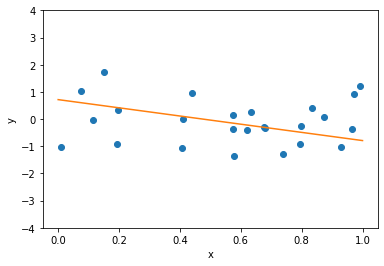

In [7]:
fig, ax = plt.subplots()
ax.plot(x_validate, y_validate, 'o')
ax.plot(x0.reshape(-1,1), lr.predict(x0.reshape(-1,1)), '-')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(-4,4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
That doesn't seem right.  Let's try multiple orders of polynomials so that we can compare them with the validation set.
</p>
<p>
     We define a function `nth_polynomial` in order to create input data whose rows are data points and whose columns are the terms in the polynomial ($x$, $x^2$, $x^3$, $\dots$)
</p>
</div>

In [8]:
def nth_polynomial(x, n):
    return np.stack([x**i for i in range(1, n+1)], axis=1)

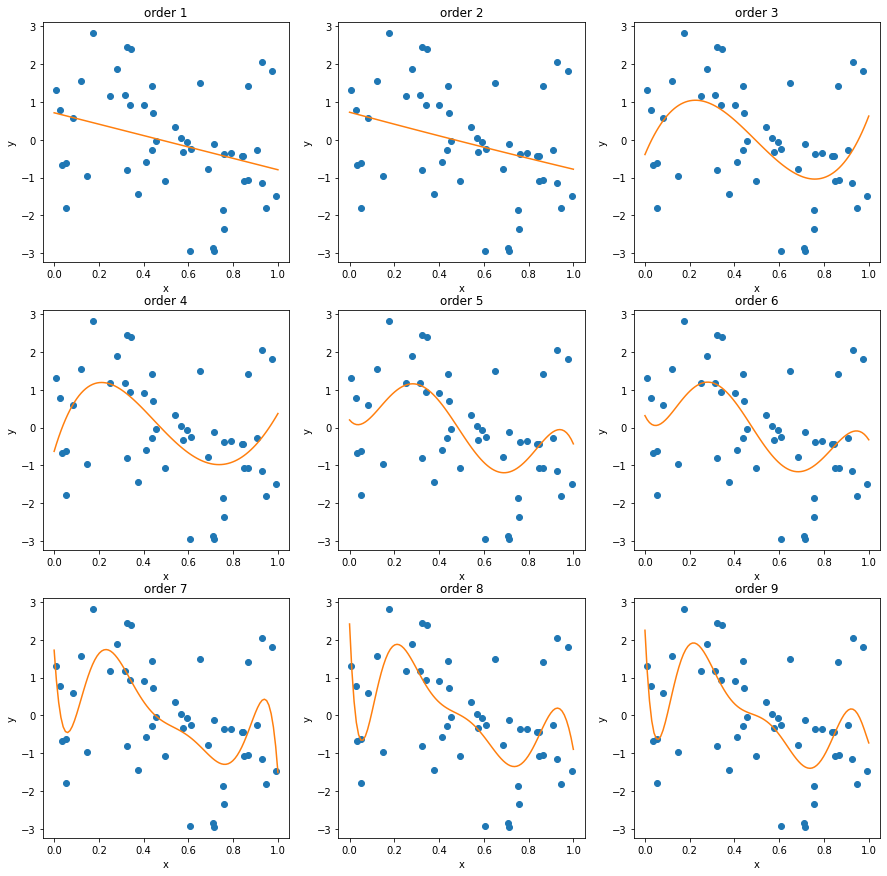

In [9]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    lr.fit(x_nth, y_train)
    
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_train, y_train, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we plot them against the validation set.
</p>
</div>

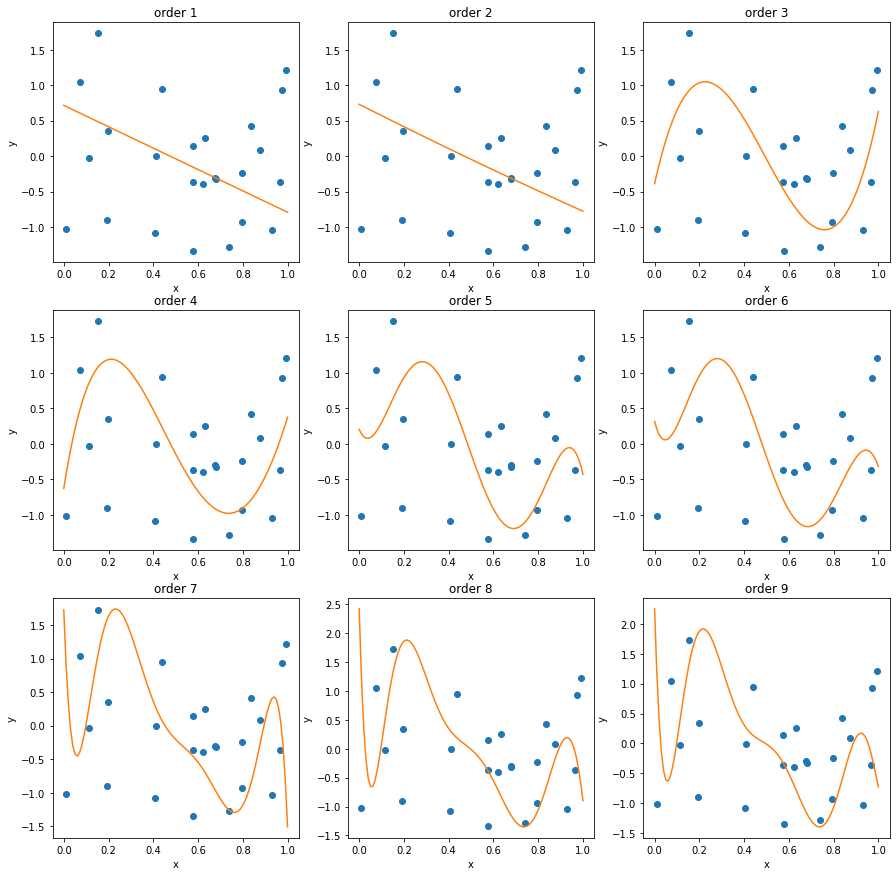

In [10]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_validate, y_validate, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
To be more precise, we compute the score, which for this model is the $R^2$ of the fit.
</p>
</div>

Best model is order:  3


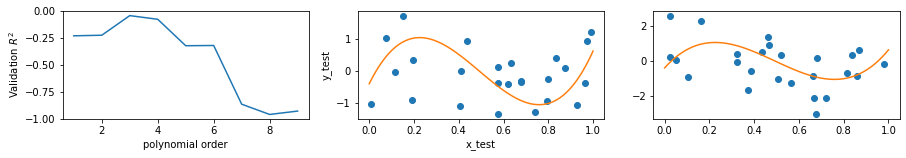

In [11]:
R2_vals = []

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_validate, i+1)
    R2 = lr.score(x_nth, y_validate)
    R2_vals.append(R2)

order = np.arange(1,max_order+1)
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(x_validate, y_validate, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax[1].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_validate')
ax[1].set_xlabel('x_validate')


ax[2].plot(x_test, y_test, 'o')
ax[2].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_test')
ax[1].set_xlabel('x_test')

print("Best model is order:  {}".format(best_model_index+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h2>Cross validation</h2>
<p>
`scikit-learn` has facilities for making cross-validation quite simple.  Here we show performing cross_validation with the functions `cross_validate` and `KFold`.  `cross_validate` performs cross validation and returns a dictionary of scores over folds.  `KFold` provides an iterator that produces indices that split the data into train and test folds.
</p>
<p>
In the following, we'll ignore the data set we labeled "validate" above.  This is just for simplicity, so I don't have extra code recreating data sets.  The data being used for validation here is part of the cross validation separation of the training set in the code below.
</p>
</div>

In [12]:
from sklearn.model_selection import cross_validate

Text(0.5, 0, 'polynomial order')

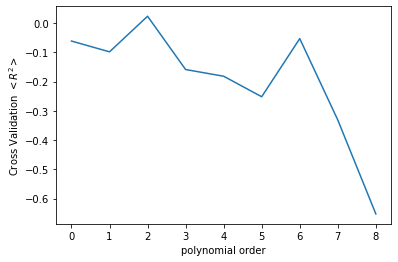

In [13]:
cv_mean_error = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    cv_dict = cross_validate(lr, x_nth, y_train, cv=4)
    cv_mean_error[i] = np.mean(cv_dict['test_score'])
    
fig, ax = plt.subplots()
ax.plot(cv_mean_error)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We can do the same analysis with `KFold`.
</p>
</div>

In [14]:
from sklearn.model_selection import KFold

Text(0.5, 0, 'polynomial order')

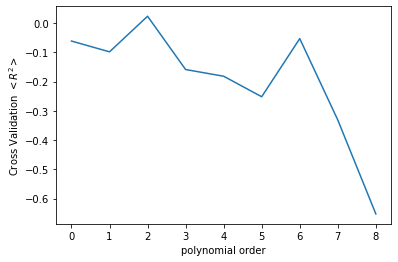

In [15]:
folds = KFold(n_splits=4)

scores = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    scores_temp = []
    for train, test in folds.split(x_train):
        x_nth = nth_polynomial(x_train[train], i+1)
        lr.fit(x_nth, y_train[train])
        x_nth = nth_polynomial(x_train[test], i+1)
        scores_temp.append(lr.score(x_nth, y_train[test]))
    scores[i] = np.mean(scores_temp)
        

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
# ax.set_ylim(-0.25, 0.25)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now that we know the best model, we can apply it to the test data.
</p>
</div>

Text(0.5, 0, 'x_test')

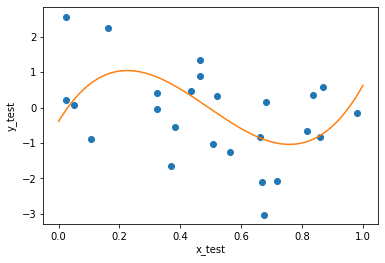

In [16]:
best_model_index = np.argmax(scores)
lr_best = lr_list[best_model_index]
x_nth = nth_polynomial(x_train, best_model_index+1)
lr_best.fit(x_nth, y_train)

fig, ax = plt.subplots()
ax.plot(x_test, y_test, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax.plot(x0, lr_best.predict(x_nth))
ax.set_ylabel('y_test')
ax.set_xlabel('x_test')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
    <h3> Task 1 </h3>
    
    <p>
    Try repeating this using a different number of splits. This number was chosen quite arbitrarily, so we'd like to know that this choice doesn't matter very much...
    </p>
    <p>
    Does it?
    </p>
</div>

Text(0.5, 0, 'polynomial order')

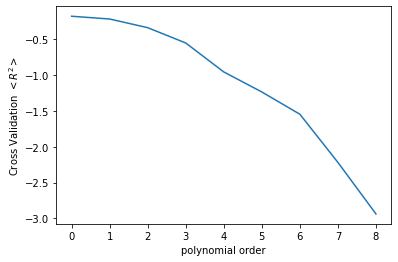

In [17]:
folds = KFold(n_splits=8)

scores = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    scores_temp = []
    for train, test in folds.split(x_train):
        x_nth = nth_polynomial(x_train[train], i+1)
        lr.fit(x_nth, y_train[train])
        x_nth = nth_polynomial(x_train[test], i+1)
        scores_temp.append(lr.score(x_nth, y_train[test]))
    scores[i] = np.mean(scores_temp)
        

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
# ax.set_ylim(-0.25, 0.25)

Text(0.5, 0, 'x_test')

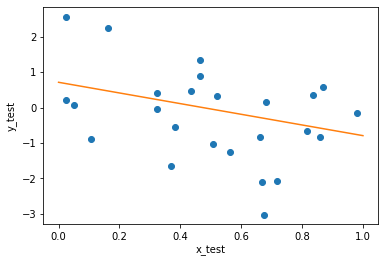

In [18]:
best_model_index = np.argmax(scores)
lr_best = lr_list[best_model_index]
x_nth = nth_polynomial(x_train, best_model_index+1)
lr_best.fit(x_nth, y_train)

fig, ax = plt.subplots()
ax.plot(x_test, y_test, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax.plot(x0, lr_best.predict(x_nth))
ax.set_ylabel('y_test')
ax.set_xlabel('x_test')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Modeling neural activity with regression</h2>
<p>
Now let's try a simple example with the Allen Brain Observatory Visual Coding Dataset. Even in the absence of a visual stimulus, neural activity within mouse visual cortex (measured e.g., with calcium fluorescence) continuosly fluctuates. In recent years it has become clear that these ongoing fluctuations often correlate with ongoing behavior of the animal, with running speed being a particularly strong correlate (e.g., Stringer et al. (2019) Science).

We now have a means to study quantitatively assess the strength and reliability of this sort of relationship. Specifically, we can construct a regression model for neural activity (using dF/F) based upon the running speed of the animal.  

</p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
The next two cells get the running speed and dff_trace for a neuron from the Visual Coding Two-Photon Dataset</p>
</div>

In [19]:
import platform
import os

platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

In [20]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_path= os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [21]:
container_id = 637998953
cell_id = 662191687

eid = boc.get_ophys_experiments(session_types=['three_session_A'], experiment_container_ids=[container_id])[0]['id']
data = boc.get_ophys_experiment_data(eid)
cell = data.get_cell_specimen_indices([cell_id])[0]

dx, time = data.get_running_speed()
time, dff = data.get_dff_traces() # returns dff traces for all in this experiment (we'll start with the continuous dff traces at the moment)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Let's begin by plotting the cell's calcium trace alongside running speed.
</p>
</div>

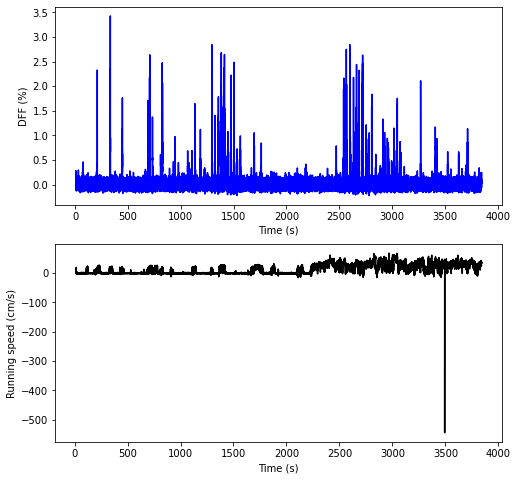

In [22]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,8))
ax1.plot(time, dff[cell,:], 'b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("DFF (%)")

ax2.plot(time, dx, 'k')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Running speed (cm/s)")
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Looks like there may some relationship here, but it's really hard to tell -- the running speed fluctuations are hardly visible, as the scale has been automatically adjusted to accommodate what appears to be a very large outlier.
</p>

<p>
If we were to model the relationship between these two variables without further processing, this one outlier could have a huge effect -- just as the outlier makes it hard to see everything else going on, the outlier's high amplitude will also contribute disproportionately to quantitative analyses that are based on variance. This is why it's crucial to visualize data!
</p>

<p>
Of course, we could manually delete this point; however, often these types of recordings have artifacts that last more than one data point, or appear more than a couple times during the experiment. Ideally, we would like to have a more systematic approach to account for these outliers.
</p>

<p>    
Fortunately, running speed is sampled at a rate (30 Hz) that is quite a bit faster than we would expect to see meaningful changes in the locomotion behavior of the animal. This makes it reasonable to apply a "median filter" to this variable, which replaces each value with the median value of the surrounding number of points (the exact number is a parameter we can choose. Median filters are an excellent strategy when tasked with removing high amplitude outliers from a signal, as the median is an outlier-robust statistic.
</p>

<p>
Let's give this another try below, plotting both the original and median-filtered running speed for comparison.
</p>
</div>

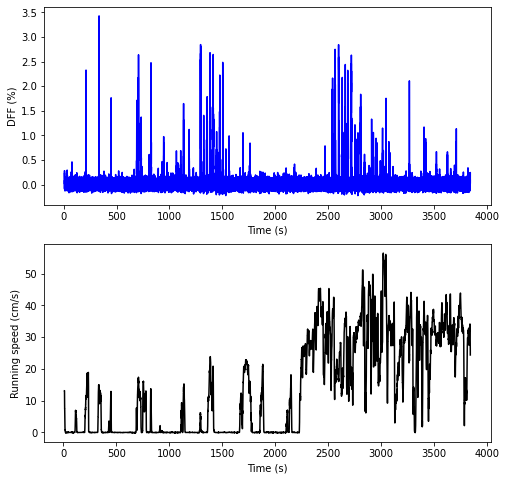

In [23]:
from scipy import signal

dx_medfilt = signal.medfilt(dx,201)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,8))
ax1.plot(time, dff[cell,:], 'b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("DFF (%)")

ax2.plot(time, dx_medfilt, 'k')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Running speed (cm/s)")
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Seems like it worked quite well! Let's move forward with the median filtered running speed then.
</p>

</div>

In [24]:
dx = dx_medfilt

In [25]:
L = dx.shape[0]

dx_train = dx[:L//2]
dx_validate = dx[L//2:3*L//4]
dx_test = dx[3*L//4:]

dff_train = dff[:,:L//2]
dff_validate = dff[:,L//2:3*L//4]
dff_test = dff[:,3*L//4:]

print((L, dff.shape[1]))

(115469, 115469)


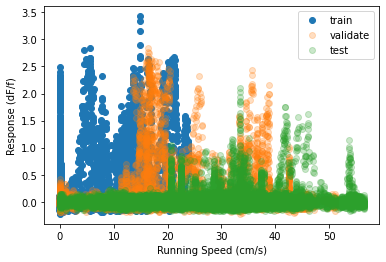

In [26]:
fig, ax = plt.subplots()
ax.plot(dx_train, dff_train[cell],'o', label='train')
ax.plot(dx_validate, dff_validate[cell],'o',alpha=0.25, label='validate')
ax.plot(dx_test, dff_test[cell],'o',alpha=0.25, label='test')
ax.set_ylabel('Response (dF/f)')
ax.set_xlabel('Running Speed (cm/s)')
plt.legend()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
There doesn't seem to be a particularly clear relationship between these variables. But, let's continue as we did above, splitting data into train, validate, and test epochs.
</p>
<p>
To simplify things (for this analysis), let's go ahead and introduce a function to break up our data into bins -- we'll use this to bin our data according to timepoints sharing a similar running speed.    
</p>
</div>

In [27]:
# Bins an array "a" by averaging its values within bins whose limits are specified by "bin_edges"
# Optionally include a list of arrays "alt_array" to be binned according to values of "a" 

def binning(a, bin_edges, alt_array=None):
    n = len(bin_edges)-1
    a_binned = np.zeros(n)
    if alt_array is not None:
        alt_binned_list = [np.zeros(n) for t in alt_array]
    for i in range(n):
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        bin_mask = np.logical_and(a >= lower, a < upper)
        a_masked = a[bin_mask]
        if len(a_masked)>0:
            a_binned[i] = np.mean(a_masked)
        else:
            a_binned[i] = 0
        if alt_array is not None:
            for j in range(len(alt_array)):
                vals = alt_array[j][bin_mask]
                if len(vals)>0:
                    alt_binned_list[j][i] = np.mean(vals)
                else:
                    alt_binned_list[j][i] = 0
            # alt_binned[i] = [np.mean(alt_array[bin_mask])
        
    if alt_array is not None:
        return a_binned, alt_binned_list
    else:
        return a_binned

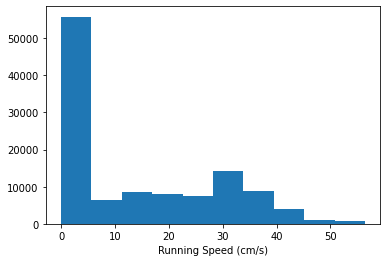

In [28]:
fig,ax = plt.subplots()
plt.hist(dx)
ax.set_xlabel('Running Speed (cm/s)')
plt.show()

In [104]:
bin_edges = np.linspace(0,40,100) # few speed values >40; let's choose 100 speed bins from 0 to 40

running_bin_train, dff_bin_train = binning(dx_train, bin_edges, [dff_train[cell]])
running_bin_validate, dff_bin_validate = binning(dx_validate, bin_edges, [dff_validate[cell]])
running_bin_test, dff_bin_test = binning(dx_test, bin_edges, [dff_test[cell]])

dff_bin_train = dff_bin_train[0]
dff_bin_validate = dff_bin_validate[0]
dff_bin_test = dff_bin_test[0]

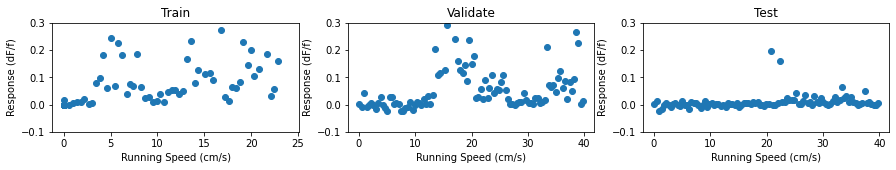

In [105]:
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(running_bin_train, dff_bin_train, 'o')
ax[1].plot(running_bin_validate, dff_bin_validate, 'o')
ax[2].plot(running_bin_test, dff_bin_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-0.1, 0.3)
    ax[i].set_xlabel('Running Speed (cm/s)')
    ax[i].set_ylabel('Response (dF/f)')

In [106]:
lr_order1 = LR()
lr_order1.fit(running_bin_train.reshape(-1,1), dff_bin_train)

LinearRegression()

In [107]:
lr_order1.intercept_, lr_order1.coef_

(-0.00787227393051769, array([0.01281502]))

Text(0, 0.5, 'Response (dF/f)')

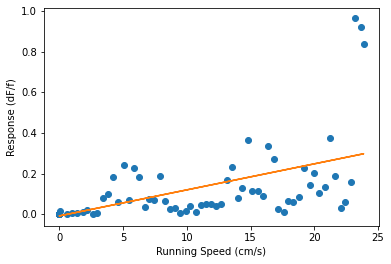

In [108]:
fig, ax = plt.subplots()
ax.plot(running_bin_train, dff_bin_train, 'o')
ax.plot(running_bin_train.reshape(-1,1), lr_order1.predict(running_bin_train.reshape(-1,1)))
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Not bad! On the other hand, it does seem like we might be able to do even better if we allowed for a more nonlinear relationship. This is the elegance of the regression framework -- as above, we may build our design matrix with polynomials of different orders in order to model this apparently nonlinear relationship.
</p>
<p>
BUT don't forget -- increasing model complexity runs the risk of decreasing generalizability (not to mention interpretability). This is a recurring theme that we will unpack more later on.
</p>
</div>

In [109]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_bin_train, i+1)
    lr.fit(running_nth_order, dff_bin_train)

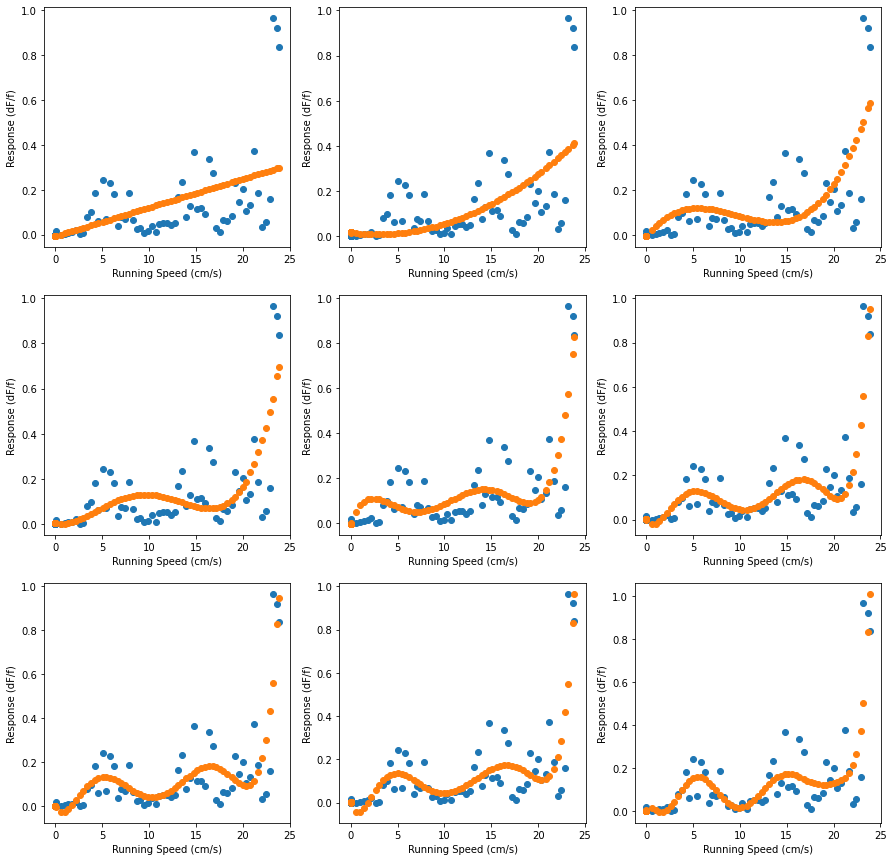

In [110]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    running_nth_order = nth_polynomial(running_bin_train, i+1)
    ax[yi, xi].plot(running_bin_train, dff_bin_train, 'o')
    ax[yi, xi].plot(running_bin_train, lr.predict(running_nth_order),'o')
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Indeed, looks like we get an even nicer fit via a nonlinear relationship. But, crucially, we need to test whether this generalizes.
</p>
</div>

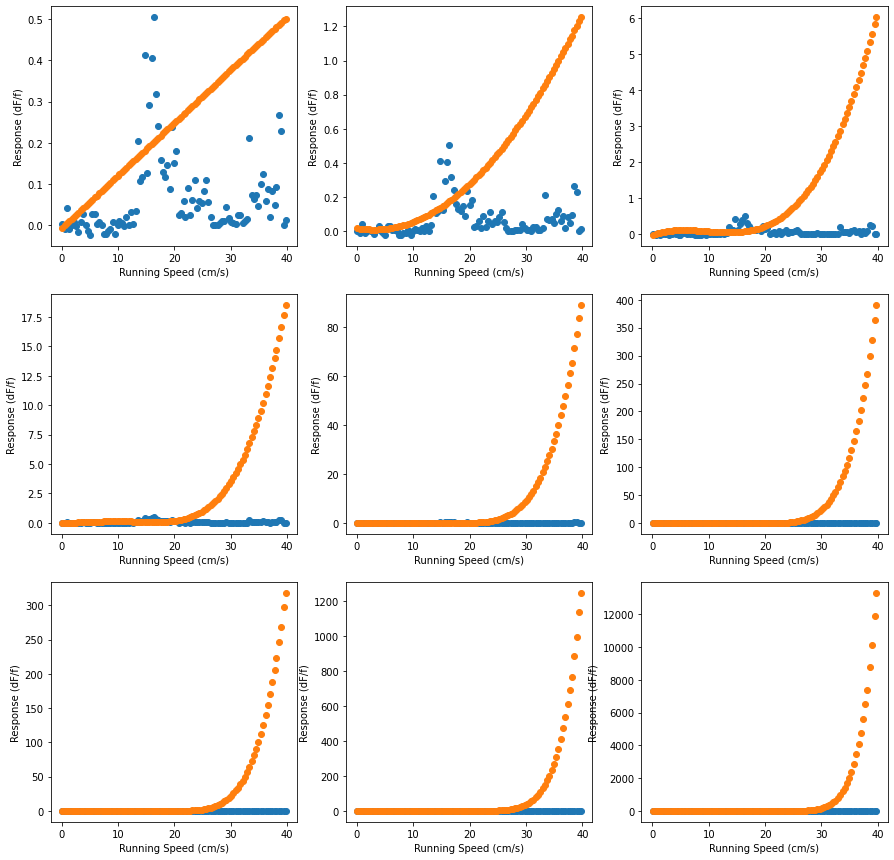

In [111]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    ax[yi, xi].plot(running_bin_validate, dff_bin_validate, 'o')
    running_nth_order = nth_polynomial(running_bin_validate, i+1)
    ax[yi, xi].plot(running_bin_validate, lr.predict(running_nth_order),'o')
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

(-0.1, 0.2)

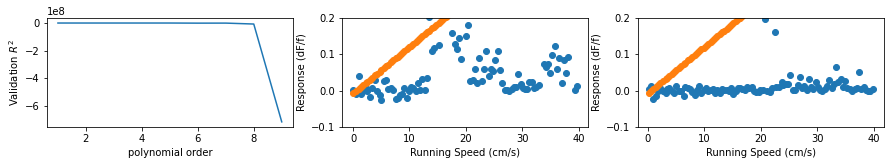

In [112]:
R2_vals = []

for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_bin_validate, i+1)
    R2 = lr.score(running_nth_order, dff_bin_validate)
    R2_vals.append(R2)
    
order = np.arange(1,len(R2_vals)+1)
    
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(running_bin_validate, dff_bin_validate, 'o')
running_nth_order = nth_polynomial(running_bin_validate, best_model_index+1)
ax[1].plot(running_bin_validate, lr_best.predict(running_nth_order),'o')
ax[1].set_xlabel('Running Speed (cm/s)')
ax[1].set_ylabel('Response (dF/f)')
ax[1].set_ylim(-0.1, 0.2)

ax[2].plot(running_bin_test, dff_bin_test, 'o')
running_nth_order = nth_polynomial(running_bin_test, best_model_index+1)
ax[2].plot(running_bin_test, lr_best.predict(running_nth_order),'o')
ax[2].set_xlabel('Running Speed (cm/s)')
ax[2].set_ylabel('Response (dF/f)')
ax[2].set_ylim(-0.1, 0.2)

In [115]:
running_nth_order = nth_polynomial(running_bin_train, best_model_index+1)
print(lr_best.score(running_nth_order, dff_bin_train))

0.37012744763586247


In [116]:
running_nth_order = nth_polynomial(running_bin_test, best_model_index+1)
print(lr_best.score(running_nth_order, dff_bin_test))

-100.8697580056395


Text(0, 0.5, 'Response (dF/f)')

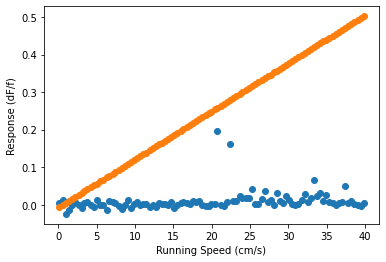

In [117]:
fig, ax = plt.subplots()

ax.plot(running_bin_test, dff_bin_test, 'o')
running_nth_order = nth_polynomial(running_bin_test, best_model_index+1)
ax.plot(running_bin_test, lr_best.predict(running_nth_order),'o')
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
    <h3> Task 2 </h3>
    
     How does our choice of running speed bin size affect the appearance of these plots?
    
</div>

In [118]:
bin_edges = np.linspace(0,40,10) # Try now with 10 instead of 100 bins

running_bin_train, dff_bin_train = binning(dx_train, bin_edges, [dff_train[cell]])
running_bin_validate, dff_bin_validate = binning(dx_validate, bin_edges, [dff_validate[cell]])
running_bin_test, dff_bin_test = binning(dx_test, bin_edges, [dff_test[cell]])

dff_bin_train = dff_bin_train[0]
dff_bin_validate = dff_bin_validate[0]
dff_bin_test = dff_bin_test[0]

(-0.1, 0.2)

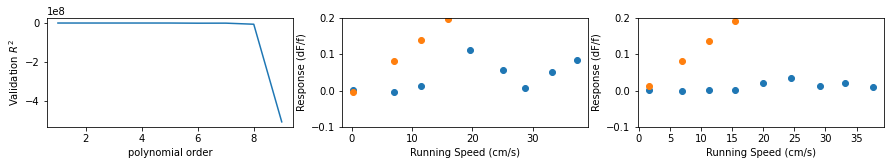

In [119]:
R2_vals = []

for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_bin_validate, i+1)
    R2 = lr.score(running_nth_order, dff_bin_validate)
    R2_vals.append(R2)
    
order = np.arange(1,len(R2_vals)+1)
    
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(running_bin_validate, dff_bin_validate, 'o')
running_nth_order = nth_polynomial(running_bin_validate, best_model_index+1)
ax[1].plot(running_bin_validate, lr_best.predict(running_nth_order),'o')
ax[1].set_xlabel('Running Speed (cm/s)')
ax[1].set_ylabel('Response (dF/f)')
ax[1].set_ylim(-0.1, 0.2)

ax[2].plot(running_bin_test, dff_bin_test, 'o')
running_nth_order = nth_polynomial(running_bin_test, best_model_index+1)
ax[2].plot(running_bin_test, lr_best.predict(running_nth_order),'o')
ax[2].set_xlabel('Running Speed (cm/s)')
ax[2].set_ylabel('Response (dF/f)')
ax[2].set_ylim(-0.1, 0.2)

In [120]:
running_nth_order = nth_polynomial(running_bin_train, best_model_index+1)
print(lr_best.score(running_nth_order, dff_bin_train))

0.7550543928711044


In [121]:
running_nth_order = nth_polynomial(running_bin_test, best_model_index+1)
print(lr_best.score(running_nth_order, dff_bin_test))

-581.0152075220259


Text(0, 0.5, 'Response (dF/f)')

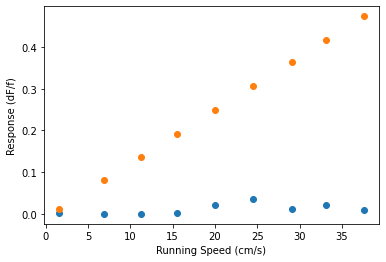

In [122]:
fig, ax = plt.subplots()

ax.plot(running_bin_test, dff_bin_test, 'o')
running_nth_order = nth_polynomial(running_bin_test, best_model_index+1)
ax.plot(running_bin_test, lr_best.predict(running_nth_order),'o')
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

In [39]:
lr_order1.score(running_bin_train.reshape(-1,1), dff_bin_train.reshape(-1,1))

0.7926391339675708

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Casting tuning curve prediction as a regression problem</h2>
<p>The above procedures provide a powerful and generalizable framework for modeling observations as a function of one or more predictor variables. To illustrate this, we may now revisit our tuning curve modeling exercise from the morning session. We will start by formalizng this exercise using our new regression framework. We'll then see how this framework allows us to easily combine tuning curve and running speed predictors into a single predictive model.  
    
Before we get started, we must address one important difference between the regression problems we've discussed above, and the tuning curve regression that we'd like to perform. Specifically, our tuning curve predictions are based on a categorical rather than continuous variable (i.e., one of $8$ possible orientations). In other words, as above, we seek a model of the form:

$$y = \beta x+C,$$

where $y$ is the calcium response, $X$ is now the stimulus information, and $\beta$ and $C$ are constants. However, this $X$ is a categorical variable.

One way to handle this would be to construct a separate model for each orientation:
$$y = \beta_1 X_1+C_1$$
$$y = \beta_2 X_2+C_2$$
$$\vdots$$
$$y = \beta_8 X_8+C_8 $$
    
Mathematically, this is cumbersome - we would need to look up which equation to use each time we want to predict new data. A more elegant alternative would be to combine predictors across orientations into a single model that simply operates piecewise:

$$y = C+ \begin{cases} 
\beta_1 X * \text{I}_1(X)  \\
\beta_2 X * \text{I}_2(X) \\
\vdots \\
\beta_8 X * \text{I}_8(X)
\end{cases}$$
    
where $\text{I}_n(X)$ is the <i>indicator function</i>:
$$ \text{I}_n(X) := \begin{cases}
1 \text{ if } X=n, \\
0 \text{ else}
\end{cases} $$

(Notice that this formulation merges the constants into one value, $C$. $C$ is, effectivly, the offset from zero for any model we fit.)

Thus, as $X$ encodes the stimulus identity, $\text{I}_n(X)$ determines which term in the equation we are operating with. This type of problem is called "One-Hot" encoding, because $X$ encodes what part of the equation is active. Practically speaking, we can implement this indicator function by creating a vector for each sample and setting $X_i = 1$ for whichever case is true. For example, if we had just two stimulus types, we might have: 

$$ X_1 = [1,0] $$
$$ X_2 = [0,1] $$ 

Finally, if we have many observations, we can stack each of these $X$ observations to form a "Design Matrix." 

We will have a corresponding fitting parameter vector, $$\beta = [\beta_1,\beta_2,\ldots,\beta_8]$$

Our whole problem can now be written: 
$$y = \beta X$$ 

    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Let's begin by revisiting our tuning curve analysis.    
</div>

In [46]:
import pandas as pd

expt_container_id = 637998953
cell_id = 662191687


boc = BrainObservatoryCache(manifest_file=manifest_path)
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])
expt_session_info_df = pd.DataFrame(expt_session_info)
expt_session_info_df

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,639254728,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),100,637998953,three_session_C2,339839,Fezf2-CreER;Ai148-339839,False
1,637998955,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),93,637998953,three_session_A,339839,Fezf2-CreER;Ai148-339839,False
2,638754323,400,VISp,Fezf2-CreER,Ai148(TIT2L-GC6f-ICL-tTA2),97,637998953,three_session_B,339839,Fezf2-CreER;Ai148-339839,False


In [47]:
session_id = expt_session_info_df[expt_session_info_df.session_type=='three_session_A'].id.iloc[0]
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [48]:
gratings = boc.get_ophys_experiment_analysis(ophys_experiment_id=session_id, stimulus_type='drifting_gratings')
gratings.dfftraces.shape

(99, 115469)

In [83]:
cell_idx = np.where(cell_id==gratings.cell_id)[0][0]

this_dff = gratings.dfftraces[cell_idx]
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)#[cell_idx,:]

In [84]:
stim_table = gratings.stim_table
stim_table.head()

,temporal_frequency,orientation,blank_sweep,start,end
0,2.0,0.0,0.0,744,804
1,15.0,135.0,0.0,835,894
2,4.0,225.0,0.0,925,985
3,1.0,135.0,0.0,1015,1075
4,15.0,90.0,0.0,1105,1165


In [85]:
# Let's organize our responses according to stimuli and cells, as we did this morning
orientation = np.zeros((len(stim_table)))
temp_freq = np.zeros((len(stim_table)))
mean_response_all_cells = np.zeros((len(stim_table),len(gratings.cell_id)))

for ii in range(len(stim_table)):
    orientation[ii] = stim_table.orientation[ii]
    temp_freq[ii] = stim_table.temporal_frequency[ii]
    
    for cc in range(len(gratings.cell_id)):
        this_response =  events[cc,stim_table.start[ii]:stim_table.start[ii]+60] # time course of the response for all cells (for this stimulus)
        mean_response_all_cells[ii,cc] = this_response.mean() # mean event occurrence over the 60 sec. time window for all cells (for this stimulus)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> As we did this morning, we'll just stick with just the temporal frequency we were looking at before.
</div>


In [86]:
orientation = orientation[temp_freq==2]
mean_response_all_cells = mean_response_all_cells[temp_freq==2,:]

In [87]:
orientations,ix = np.unique(orientation,return_inverse=True)
print(orientations)

[  0.  45.  90. 135. 180. 225. 270. 315.]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Let's now try to recast this problem in the regression framework. The first step is to turn these stimuli into a design matrix that we can use to predict responses. Remember that the design matrix can be constructed in many different ways, e.g., by evaluating polynomials of varying degree for each of the orientations. For simplicity, here we'll just use "identity functions" -- making this a basic linear regression problem.
</div>

In [88]:
# Lets build a matrix for every stimulus condition
stims = np.vstack([orientation]).T

# Each stimulus condition has a unique identity
stimuli,stim_index,counts = np.unique(stims,axis=0,return_counts=True,return_inverse=True)

# How many are there?
print(len(stimuli))


8


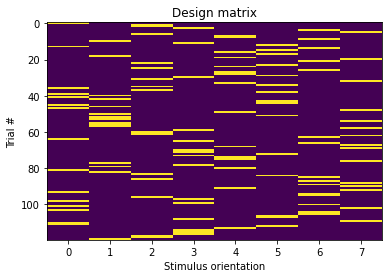

In [89]:
# Build the design matrix
X = np.zeros((len(stim_index),len(stimuli)))
for ii in range(len(stim_index)):
    X[ii,stim_index[ii]] = 1
    
fig,ax = plt.subplots()
ax.imshow(X,aspect='auto',interpolation='nearest')
ax.set_xlabel('Stimulus orientation')
ax.set_ylabel('Trial #')
plt.title('Design matrix')

plt.show()

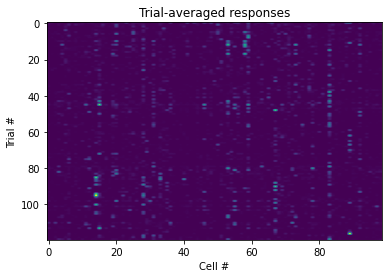

In [90]:
fig,ax = plt.subplots()
ax.imshow(mean_response_all_cells,aspect='auto')
ax.set_xlabel('Cell #')
ax.set_ylabel('Trial #')
plt.title('Trial-averaged responses')

plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
    <h3> Task 3 </h3>
    
    <p>
    Its hard to see a relationship between the two matrices by eye -- the design matrix isn't organized very clearly. Try sorting the design matrix rows (hint -- recall our morning workshop!) such that trials having a similar orientation are grouped together in a block diagonal structure.
    </p>
    <p>
    Apply the same sorting to the responses matrix. Does this help us visualize potential relationships? How would ``visually tuned" cells appear in such a plot?
    </p>
</div>

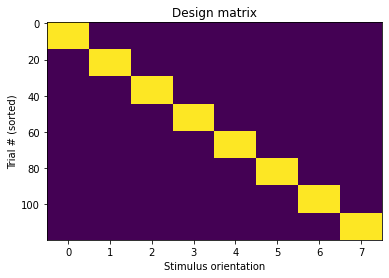

In [91]:
inds = np.argmax(X > 0, axis=1)

fig,ax = plt.subplots()
ax.imshow(X[np.argsort(inds)],aspect='auto',interpolation='nearest')
ax.set_xlabel('Stimulus orientation')
ax.set_ylabel('Trial # (sorted)')
plt.title('Design matrix')

plt.show()

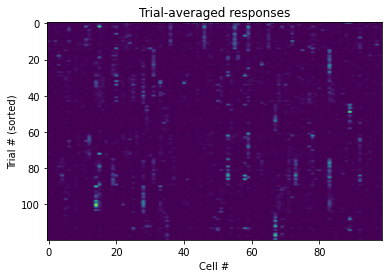

In [92]:
fig,ax = plt.subplots()
ax.imshow(mean_response_all_cells[np.argsort(inds)],aspect='auto')
ax.set_xlabel('Cell #')
ax.set_ylabel('Trial # (sorted)')
plt.title('Trial-averaged responses')

plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Now, to split up our data once more. Recall that there are many ways to do this, with $k$-fold cross-validation being a particularly elegant strategy. For simplicity here, we will go back to our simple "train-test" split based on the first and second halves of the data.
</div>

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

mean_response = mean_response_all_cells[:,cell_idx]

X_train, X_test, y_train, y_test = train_test_split(X, mean_response, test_size=0.5, random_state=42)

In [94]:
rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

In [95]:
scr_train = rfmodel.score(X_train,y_train) # R^2 (since this is a linear model)
scr_train

0.4089443528603971

In [96]:
scr_test = rfmodel.score(X_test,y_test)
scr_test

-0.16867499325524338

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In general, we see that model performance is worse in test data as compared to training data. Of course, this is expected -- our model was optimized for the training data!
</p>

<p>
So, how we can improve model performance? One approach might be to include predictor variables that could aid in our ability to model neuronal responses. A common observation is that the behavioral state of the mouse -- in particular, whether or not is currently running -- can alter the responses of neurons to visual stimuli. We'll dig into this topic a bit more on Day 5. For now, let's just see if adding running information can improve our model performance.
</p>
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
    
    <h3> Task 4 </h3>
    
     How might this result change if we selected another temporal frequency? Or, what if we examined all stimuli, without filtering by temporal frequency?
</div>

In [63]:
# We'll try no filtering on temporal frequency

# Let's organize our responses according to stimuli and cells, as we did this morning
orientation = np.zeros((len(stim_table)))
temp_freq = np.zeros((len(stim_table)))
mean_response_all_cells = np.zeros((len(stim_table),len(gratings.cell_id)))

for ii in range(len(stim_table)):
    orientation[ii] = stim_table.orientation[ii]
    temp_freq[ii] = stim_table.temporal_frequency[ii]
    
    for cc in range(len(gratings.cell_id)):
        this_response =  events[cc,stim_table.start[ii]:stim_table.start[ii]+60] # time course of the response for all cells (for this stimulus)
        mean_response_all_cells[ii,cc] = this_response.mean() # mean event occurrence over the 60 sec. time window for all cells (for this stimulus)


In [64]:
orientations,ix = np.unique(orientation,return_inverse=True)

stims = np.vstack([orientation]).T

stimuli,stim_index,counts = np.unique(stims,axis=0,return_counts=True,return_inverse=True)

# Build the design matrix
X = np.zeros((len(stim_index),len(stimuli)))
for ii in range(len(stim_index)):
    X[ii,stim_index[ii]] = 1
    

In [65]:
mean_response = mean_response_all_cells[:,cell_idx]
X_train, X_test, y_train, y_test = train_test_split(X, mean_response, test_size=0.5, random_state=42)

In [66]:
rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

In [67]:
scr_train = rfmodel.score(X_train,y_train) # R^2 (since this is a linear model)
scr_train

0.15900240944576605

In [68]:
scr_test = rfmodel.score(X_test,y_test)
scr_test

-0.0015394610186854063

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Multiple linear regression: combining stimulus orientation and running speed</h2>
<p> We now have a precise quantification of how well tuning information predicts variability in the visual responses (as measured by calcium fluorescence). We now wish to see whether running speed can improve our model performance. Ideally, we'd like to systematically re-evaluate polynomial order in the context of tuning information, as the "best order" can change. In the interest of time, though, we'll stick with the best-performing model that we learned above.
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Let's start by (re-)examining how running speed varies over the course of the session.
    </div>

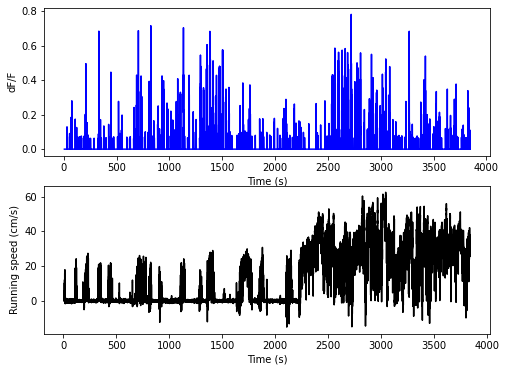

In [97]:
# Load running speed
dx, dxtime = data_set.get_running_speed()

# We'll need to reapply our median filter
dx = signal.medfilt(dx,3)

# Let's plot running speed alongside the calcium trace we've been studying.
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('dF/F')
ax1.plot(gratings.timestamps, events[cell_idx,:], color='b')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Running speed (cm/s)')
ax2.plot(dxtime, dx, color='k')

plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
To get a better sense of how locomotion relates to the stimulus responses, let's start by splitting up trials into "running" and "still" and see whether our tuning curve changes.
</p>
</div>

In [98]:
spd = np.zeros((len(stim_table),60))
for ii in range(len(stim_table)):
    spd[ii,:] = dx_medfilt[stim_table.start[ii]:stim_table.start[ii]+60]

spd = spd[temp_freq==2,:]

mean_spd = spd.mean(axis=1)
run_mask = mean_spd>0
still_mask = mean_spd<=0

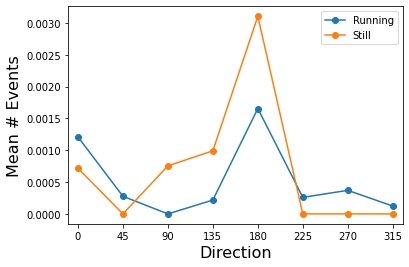

In [99]:
## Reconstruct tuning curve events, separating "running" vs. "still" trials
tuning_run = np.zeros(orientations.shape)
tuning_still = np.zeros(orientations.shape)
for ii in range(orientations.shape[0]):
    tuning_run[ii] = mean_response[(ix==ii) & run_mask].mean()
    tuning_still[ii] = mean_response[(ix==ii) & ~run_mask].mean()
    
fig,ax = plt.subplots()
ax.plot(orientations,tuning_run, 'o-', label='Running')
ax.plot(orientations,tuning_still, 'o-', label='Still')
ax.set_xticks(orientations)
ax.set_xlim(-10,325)
ax.set_xlabel("Direction", fontsize=16)
ax.set_ylabel("Mean # Events", fontsize=16)
plt.legend()
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Looks like direction tuning is more apparent when the mouse is still! Of course, this is simply an initial impression...it remains unclear whether this apparent effect is stronger than expected by chance, and if so, whether it generalizes well to unseen data. To answer these questions, we'll now look to incorporate running speed (as a continuous variable) into our regression model.
</div>

Text(0, 0.5, 'Trial #')

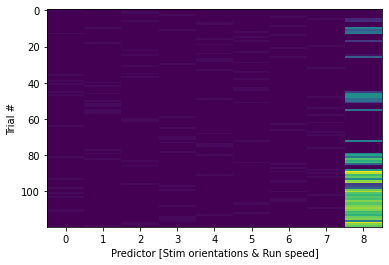

In [100]:
# Let's start by constructing a new design matrix, "Xspd", that now includes running speed.   

mean_spd = spd.mean(axis=1).reshape(-1,1) # mean speed during each trial
running_nth_order = np.squeeze(nth_polynomial(mean_spd, best_model_index+1))

Xspd = np.concatenate((X,running_nth_order.reshape(-1,1)), axis=1) # add column for run speed predictor; for binarized, replace mean_spd w/ run_mask.reshape(-1,1)

fig,ax = plt.subplots()
ax.imshow(Xspd,aspect='auto',interpolation='nearest')
ax.set_xlabel('Predictor [Stim orientations & Run speed]')
ax.set_ylabel('Trial #')

In [101]:
# Now to update our train-test split with the new design matrix

X_train, X_test, y_train, y_test = train_test_split(Xspd, mean_response, test_size=0.5, random_state=42)

rfmodel = LinearRegression(fit_intercept=False).fit(X_train, y_train,)

In [102]:
scr_train = rfmodel.score(X_train,y_train)
scr_train

0.41123801926361825

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Hm...just a slight improvement ~40% of variance explained by just stimulus information in the training data set.
    </div>

In [103]:
scr_test = rfmodel.score(X_test,y_test)
scr_test

-0.16567199753767547

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> :( It seems that we're still not doing well on the test data points. There are a few potential reasons for this. <i>Overfitting</i> is a particularly general problem that we'll encounter repeatedly -- our model parameters have been fit well to the training data, but fail to generalize to unseen observations. This accuracy vs. generalizability trade-off is a standard issue encountered in machine learning problems.
</p>

<p>There are additional challenges at play here, however. Recall how our running plots indicated far more running during the test as opposed to training timepoints. These kinds of violations of <i>stationarity</i> (i.e., fixed mean and/or variance of a process over time) pose a major challenge to data analysis — particularly data from awake, behaving animals. In such cases, how can we perform our train/validation/test splits becomes highly consequential. </p>
  <p>  
Consider the following...</p>
    <ul>
        <li>How might our analysis change if we exclude the final part of the session, when the mouse started running more?</li>
        <li>Would it matter if we swapped our train and test epochs?</li>
        <li>If we instead assigned every other time point to train or test data, such that training and test points are scattered throughout, would that fix the problem?</li>
        <ul>
            <li>What assumptions are we making in doing this?</li>
        </ul>
    </ul>
</div>
